#               Sales Data Analysis 

####  In this notebook I am going to try explore the data I have and going to answer questions like:

 - What was the best month for sales? How much was earned that month?
 - What is the best time to display the advertisement which will increase the likelihood of customer buying the products?
 - What products are most often sold together?
 - Top selling products by quantity 
 - Is there any correlation between price of the products and quantity ordered?
 - Which city sold the highest number of product?

### Import the Required Modules

In [380]:
import os, glob
from glob import iglob
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Merge data from multiple csv files into one csv file

In [381]:
path = "./SalesAnalysis/Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    data = pd.concat([data, current_data])
    
data.to_csv("sales_data.csv", index=False)

 ### Read dataset and generate pandas dataframe.

In [382]:
sales_data = pd.read_csv("sales_data.csv")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [383]:
# List of columns in dataset
sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [384]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [385]:
sales_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Count the number of missing value in each column


In [386]:
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## Data Cleaning

In [387]:
sales_data = sales_data.dropna(how='all') #Dropping the null value
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [388]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [389]:
#skipping the row which has text in "Order Date" column

sales_data = sales_data[sales_data['Order Date'].str[0:2]!='Or'] 

# making a new column with only the date part (not including the hour and minutes part) 
sales_data["Order_Date_"] =sales_data['Order Date'].apply(lambda x : x.split(" ")[0]) 

# only taking the month part and making a new column

sales_data['sales_month'] = sales_data['Order_Date_'].apply(lambda x : x.split("/")[0]) 


In [390]:
#changing the "Order Date" column into a datetime format and making new columns called "Hour" and "Minute".

sales_data['Hour'] = pd.to_datetime(sales_data['Order Date']).dt.hour 
sales_data['Minute'] =pd.to_datetime(sales_data['Order Date']).dt.minute

In [391]:
#changing the data type of "Quantity Ordered" to numeric

sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce')

## Data Visualization
#### It's time to get deeper into our data and get some insights!

### Pie graph of 'Product type' and 'Quantity Ordered'

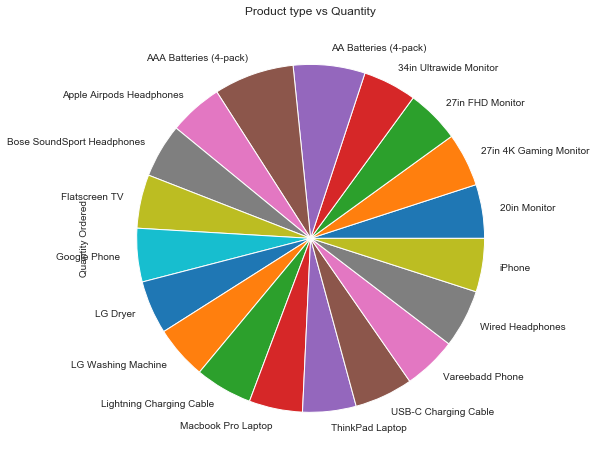

In [392]:

sales_quantity = sales_data.groupby('Product').mean()['Quantity Ordered']
fig, axes = plt.subplots(figsize=(8,8))
quantity_plot= sales_quantity.plot(kind='pie', title="Product type vs Quantity")

In [393]:
#changing the data type of "Quantity Ordered"  column from string to integer

sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce').astype('Int64')


In [ ]:
#changing the data type of "Price Each"  column to float

sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors='coerce')


In [394]:
# Creating a new colum called "total_sales" (total_sales= Quantity Ordered * Price Each) in the dataframe

sales_data['total_sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each'].astype('float') 
sales_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_,sales_month,Hour,Minute,total_sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04/19/19,04,8,46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04/07/19,04,22,30,99.99


In [395]:
sales_count_by_month=sales_data.groupby(["sales_month"]).size().sort_values(ascending=False)
sales_count_by_month

sales_month
12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
dtype: int64

In [396]:
sales_by_month=sales_data.groupby(["sales_month"]).total_sales.sum().sort_values(ascending=False)
sales_by_month

sales_month
12    4.613443e+06
10    3.736727e+06
04    3.390670e+06
11    3.199603e+06
05    3.152607e+06
03    2.807100e+06
07    2.647776e+06
06    2.577802e+06
08    2.244468e+06
02    2.202022e+06
09    2.097560e+06
01    1.822257e+06
Name: total_sales, dtype: float64

###  Sales by month


Text(0, 0.5, 'Total Sales')

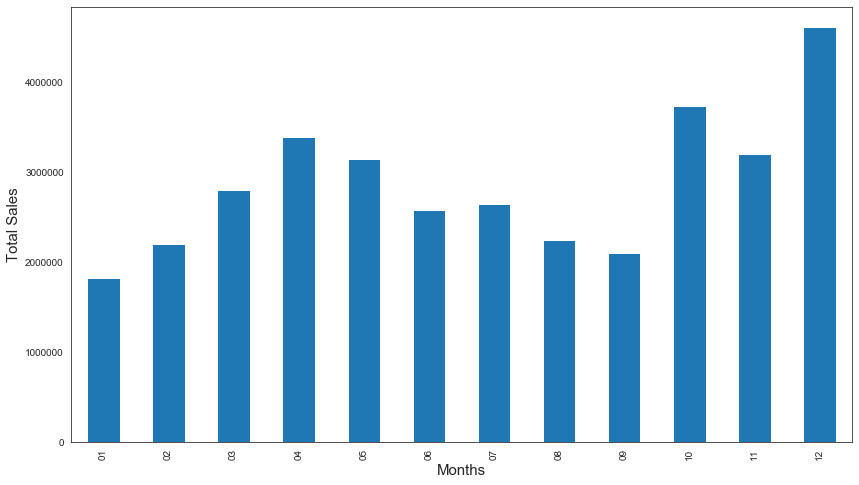

In [397]:
sales_quantity=sales_data.groupby(['sales_month']).sum()['total_sales']
fig, axes = plt.subplots(figsize=(14,8))
sale_month_plot= sales_quantity.plot(kind='bar')
sale_month_plot.set_xlabel("Months",fontsize=15)
sale_month_plot.set_ylabel("Total Sales",fontsize=15)


### What is the best time to display the advertisement which will increase the likelihood of customer buying the products

In [398]:

sales_hour=sales_data.groupby(["Hour"]).size().sort_values(ascending=False)

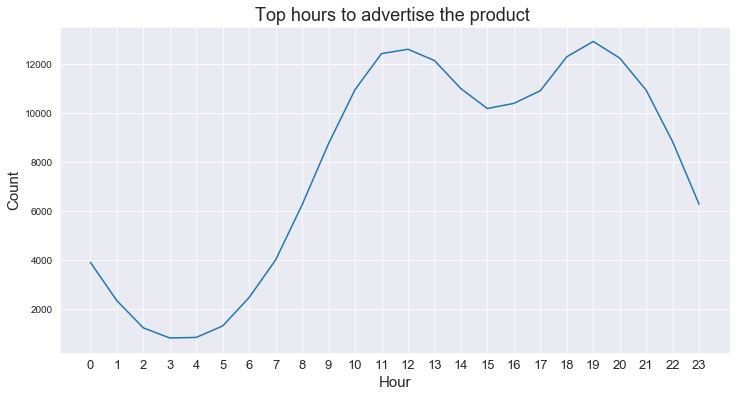

In [399]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title("Top hours to advertise the product ",fontsize=18)
top_sales_hour=sales_data.groupby(['Hour']).size()
plt.ylabel("Count",fontsize=15)
plt.xlabel("Hours",fontsize=15)

plt.xticks(top_sales_hour.index,fontsize=13)
#plt.yticks(top_sales_hour.values,fontsize=10)
sns.lineplot(x=top_sales_hour.index,y=top_sales_hour.values)

It seems slightly before 11am or 7pm are the best time to advertise products. According to graph, people are buying more products at around 11 am in the morning and around 7pm in the evening. It does make sense because 11 am in the morning is not a crazy busy time for people who are at home even for working people its kind of a little bit relax time. they might scrolling through the website while having a cup of tea/coffee. In the evening, its also expected to see a huge sale at around 7 pm. After work people might be relaxing and scrolling through the website to buy products.

### What products are most often sold together

In [400]:
df=sales_data.copy()

In [401]:
df = df[df['Order ID'].duplicated(keep=False)]

In [402]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [403]:

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Entries by Product and Quantity ordered

In [404]:

product_ordered=sales_data.groupby('Product')["Quantity Ordered"].sum().sort_values(ascending=False)


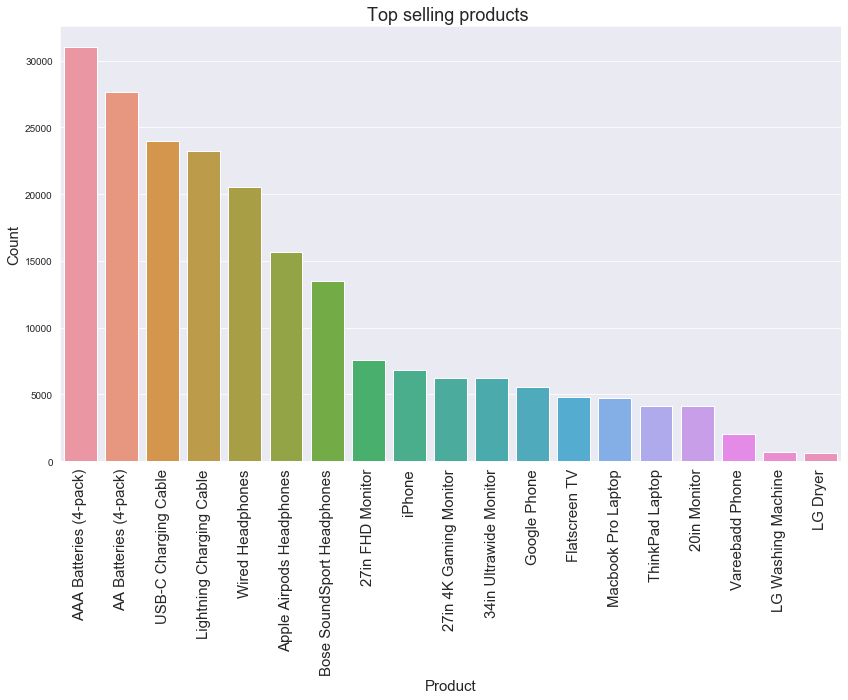

In [405]:
sns.set_style("darkgrid")
#sns.set_palette('Set3')
plt.figure(figsize=(14,8))
plt.title("Top selling products ",fontsize=18)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Hour",fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
#plt.yticks(top_sales_hour.values,fontsize=10)
sns.barplot(x=product_ordered.index,y=product_ordered.values)

    It can be seen that AAA and AA Batteries are top selling products by quantity. Washing machine and Dryer are least selling products. 

### Finding the correlation between price of the products and quantity ordered

In [406]:

prices = sales_data.groupby('Product')['Price Each'].mean()
product_ordered=sales_data.groupby('Product')["Quantity Ordered"].sum()


[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

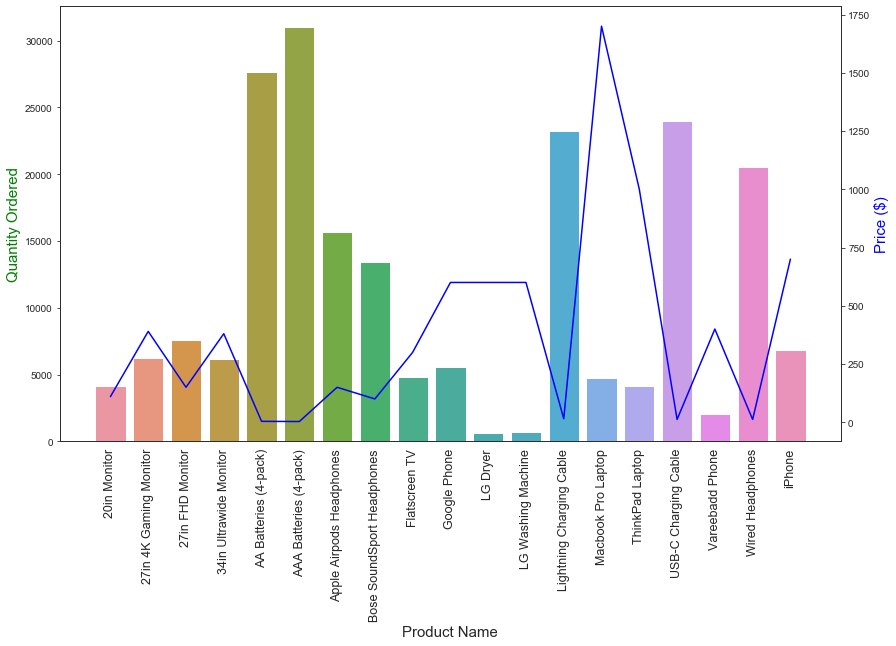

In [407]:
sns.set_style("white")
plt.figure(figsize=(14,8))
ax1=sns.barplot(x=product_ordered.index,y=product_ordered.values)
ax2 = plt.twinx()
sns.lineplot(x=prices.index,y=prices.values, color="b", ax=ax2)
ax1.set_xlabel('Product Name',size=15)
ax1.set_ylabel('Quantity Ordered', color='g',size=15)
ax2.set_ylabel('Price ($)', color='b',size=15)
ax1.set_xticklabels(labels=prices.index,rotation='vertical', size=12.5)


It is clear from the graph that whenever the price of the product is low, the quantity of ordered product is high and vice versa. 'AA' and  'AAA' Batteries are low priced item so those are top selling items. On the otherhand Macbook Pro and ThinkPad Laptops are less ordered products as they are costly.

###  Which city sold the highest number of product?

In [408]:
def get_city(address):
#     print(address)
    return address.split(',')[1]

def get_state(address):
#     print(address)
    return address.split(',')[2].split(" ")[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

In [409]:
sale_by_area=sales_data.groupby('City')["total_sales"].sum().sort_values(ascending=False)

Text(0.5, 0, 'City')

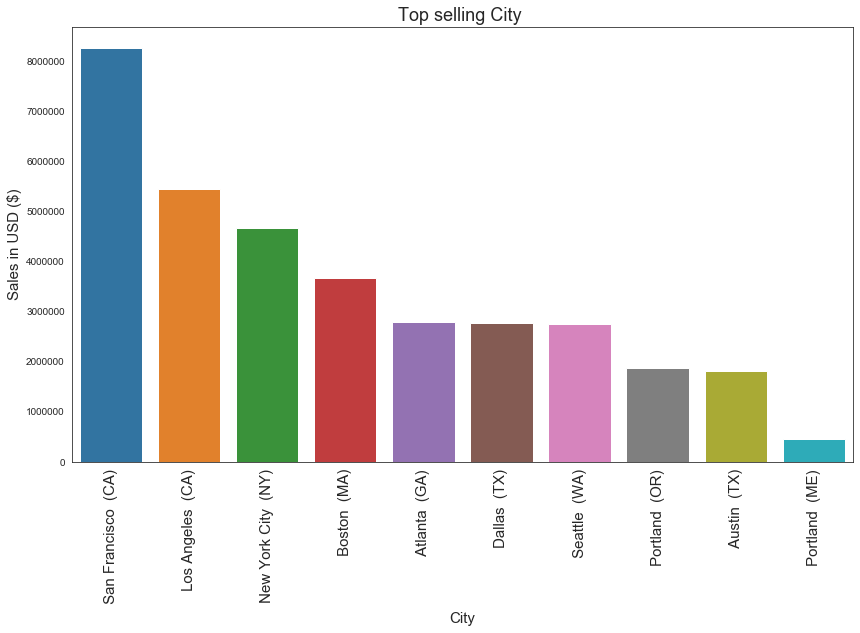

In [410]:
sns.set_style("white")
#sns.set_palette('Set3')
plt.figure(figsize=(14,8))
plt.title("Top selling City ",fontsize=18)
plt.ylabel("Sales in USD ($)",fontsize=15)

plt.xticks(rotation='vertical',fontsize=15)
#plt.yticks(top_sales_hour.values,fontsize=10)
sns.barplot(x=sale_by_area.index,y=sale_by_area.values)
plt.xlabel("City",fontsize=15)

### Sales by months and city

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

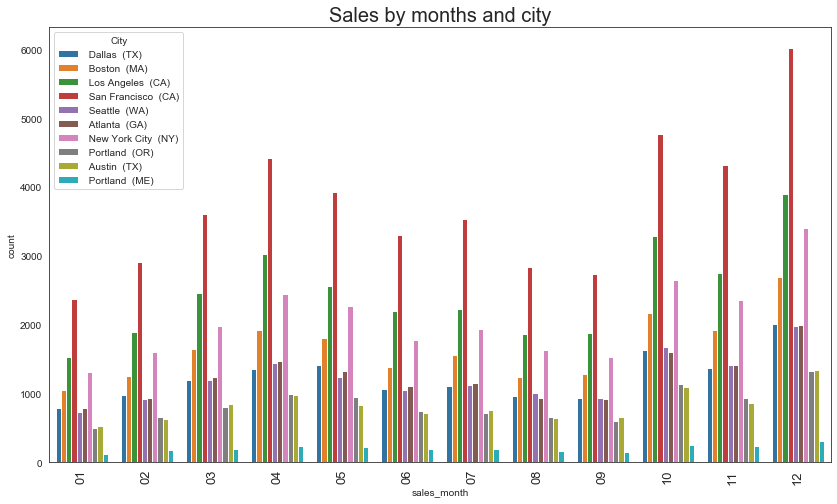

In [411]:
plt.figure(figsize=(14,8))
plt.title("Sales by months and city",fontsize=20)
#sns.countplot("Product",hue="City",data=sales_data)

sns.countplot("sales_month",hue="City",data=sales_data)

plt.xticks(rotation='vertical',fontsize=13)

In every month San Francisco consistantly had the highest number of products sales record.

### Sales amount by product category

In [434]:
sales_ = sales_data.groupby('Product').sum().sort_values(by="total_sales",ascending=False)
sales=sales_[["total_sales"]]
sales

,total_sales
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56
34in Ultrawide Monitor,2355558.01
Apple Airpods Headphones,2349150.00
Flatscreen TV,1445700.00
Bose SoundSport Headphones,1345565.43


### How much money makes the company by selling Macbook Pro Laptop in different months.

In [412]:
bb=sales_data.loc[(sales_data.Product=="Macbook Pro Laptop") & (sales_data.sales_month=="04")].total_sales.sum()
bb

771800.0

In [413]:
b=sales_data.loc[(sales_data.Product=="Macbook Pro Laptop") & (sales_data.sales_month=="12")].total_sales.sum()
b

1093100.0

In [414]:
c=sales_data.loc[(sales_data.Product=="Macbook Pro Laptop") & (sales_data.sales_month=="11")].total_sales.sum()
c

748000.0

In [415]:
x=sales_data.loc[(sales_data.Product=="Macbook Pro Laptop") & (sales_data.sales_month=="01")].total_sales.sum()
x

399500.0

,total_sales
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56
34in Ultrawide Monitor,2355558.01
Apple Airpods Headphones,2349150.00
Flatscreen TV,1445700.00
Bose SoundSport Headphones,1345565.43
